En aquesta pràctica treballareu amb un model de detecció d’objectes basat en PyTorch i la xarxa neuronal VGG16. L'objectiu es modificar el model per adaptar-lo a un problema de detecció d'objectes específic utilitzant un conjunt de dades simples.

![Exemple](08_Detecció/imgs/img.png)

Emprarem un *dataset* de detecció d'objectes que conté imatges d'estrelles. Aquest conjunt de dades és senzill i ideal per a practicar tècniques de detecció d'objectes. El podeu trobar a Kaggle al següent [enllaç](https://www.kaggle.com/datasets/kishanj/simple-object-detection). Per carregar aquest tipus de dataset haurem d'implementar una classe personalitzada que hereti de `torch.utils.data.Dataset`.

Path to dataset files: C:\Users\Miquel\.cache\kagglehub\datasets\kishanj\simple-object-detection\versions\1
Loaded 112 images
Label: a (1)
Bounding Box: {'xmin': 38, 'ymin': 54, 'xmax': 179, 'ymax': 173}


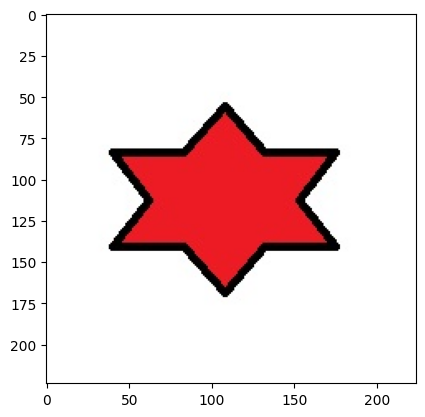

In [ ]:
from torch.utils.data import Dataset
import kagglehub
import os
from torch import nn
from torchvision import models, transforms
from lxml import etree
from matplotlib.pyplot import imshow


class EstrellesDataset(Dataset):
    def __init__(self, transforms):
        super().__init__()
        self.transform = transforms
        # Download latest version
        path = kagglehub.dataset_download("kishanj/simple-object-detection")
        print("Path to dataset files:", path)
        path = os.path.join(path,"datasets")
        #load images, annotations and bboxes from path
        self.__loadDataset__(path)
        # Load images and annotations
        # TODO
    
    def __loadDataset__(self,path):
        self.imgs = []
        self.labels = []
        self.bboxes = []
        for (dirpath,_,filenames) in os.walk(path):
            for filename in filenames:
                if(filename.endswith(".jpg")):
                    img = self.__loadImage__(os.path.join(dirpath,filename))
                    self.imgs.append(img)
                elif(filename.endswith(".xml")):
                    boundbox = self.__readXmlBndBox__(os.path.join(dirpath,filename))
                    self.labels.append(filename.removesuffix(".xml"))
                    self.bboxes.append(boundbox)
                else:
                    pass
        pass
        if len(self.imgs) != len(self.labels) or len(self.imgs) != len(self.bboxes):
            raise ValueError("Mismatch in number of images, labels and bounding boxes")
        print("Loaded {} images".format(len(self.imgs)))
    
    def __loadImage__(self,filepath):
        from PIL import Image
        img = Image.open(filepath).convert("RGB")
        return img

    def __readXmlBndBox__(self,filepath):
        bndBoxElem = ""
        doc = etree.parse(filepath)
        objectElement = doc.find("object")
        bndBoxElem = objectElement.find("bndbox")
        return {
            "xmin": int(bndBoxElem.find("xmin").text),
            "ymin": int(bndBoxElem.find("ymin").text),
            "xmax": int(bndBoxElem.find("xmax").text),
            "ymax": int(bndBoxElem.find("ymax").text)
        }

    def __len__(self):
        return len(self.imgs)
        # TODO

    def __getitem__(self, idx):
        img = self.imgs[idx]
        label = self.labels[idx]
        bbox = self.bboxes[idx]
        
        if self.transform:
            img = self.transform(img)
        
        return img, label, bbox



transform = transforms.Compose([
    transforms.ToTensor(),
])
my_dataset = EstrellesDataset(transforms=None)
img,label,boundbox  = my_dataset.__getitem__(0)

## Preparació del model

Començarem carregant el model VGG16 preentrenat i adaptant-lo per a la detecció d'objectes. Afegirem capes addicionals per predir les caixes delimitadores (bounding boxes) i les classes dels objectes.

In [ ]:
from torch import nn
from torchvision import models, transforms

vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
backbone = vgg16.features

class VGG16ObjectDetector(nn.Module):
    def __init__(self, backbone):
        super().__init__()
        self.backbone = backbone
        self.avgpool = # TODO

        # Capes fully-connected de la VGG original
        self.flatten = nn.Flatten()
        self.fc =

        # Cap de classificació
        self.class_head =

        # Cap de regressió de bounding box
        self.bbox_head =

    def forward(self, x):
        #TODO

        return class_logits, bbox_preds

VGG16ObjectDetector(backbone=backbone)

sortida de classificació i una altra de regressió de bounding box.